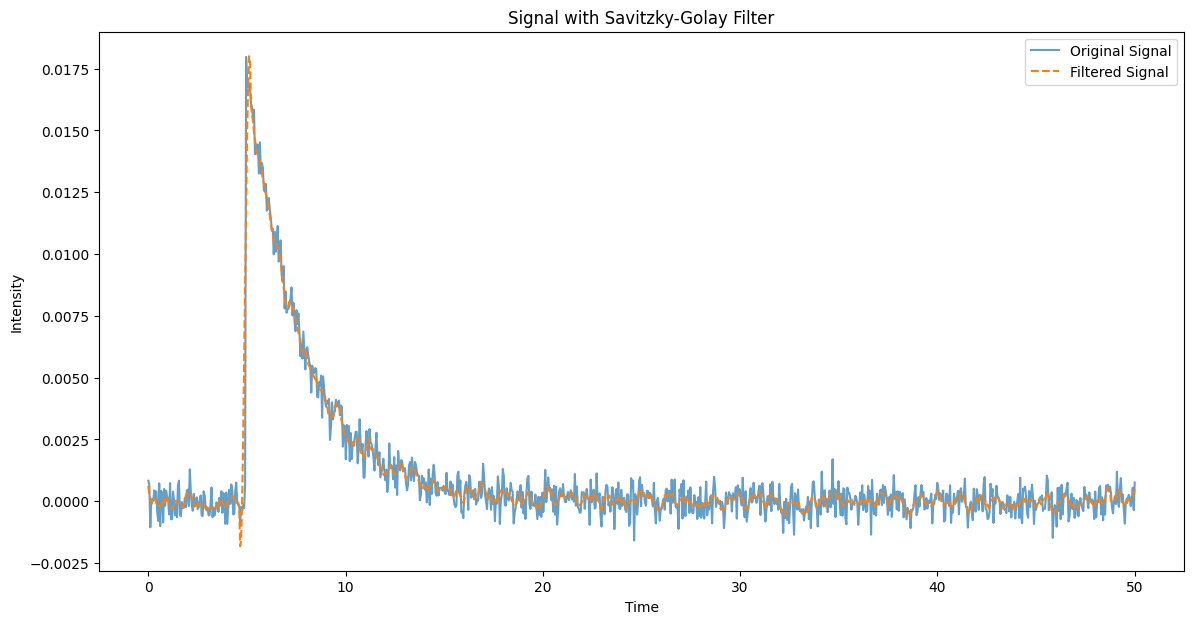

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

def generate_irf_signal(time, irf_center, irf_width, signal_params, amplitudes, noise_level=0.05, irf_shift=0):
    # Generate IRF as a Gaussian
    irf = np.exp(-((time - irf_center)**2) / (2 * (irf_width**2)))  
    irf /= np.sum(irf)  # Normalize IRF
    
    # Generate a model signal as a sum of three exponentials
    tau1, tau2, tau3 = signal_params
    amp1, amp2, amp3 = amplitudes
    model_signal = amp1 * np.exp(-time / tau1) + amp2 * np.exp(-time / tau2) + amp3 * np.exp(-time / tau3)
    
    # Convolve the model signal with the IRF
    signal = np.convolve(model_signal, irf, mode='same')
    
    # Convert IRF shift from time units to index units
    time_resolution = np.mean(np.diff(time))
    index_shift = int(irf_shift / time_resolution)
    
    # Apply shift to the signal
    signal_shifted = np.roll(signal, index_shift)
    
    # Normalize the shifted signal
    signal_shifted /= np.sum(signal_shifted)
    
    # Add noise
    irf += np.random.normal(0, noise_level, irf.shape)
    signal_shifted += np.random.normal(0, noise_level, signal_shifted.shape)
    
    return time, signal_shifted, irf

def apply_savgol_filter(signal, window_length=12, polyorder=3):
    return savgol_filter(signal, window_length, polyorder)

def plot_signals(time, original_signal, filtered_signal, irf):
    plt.figure(figsize=(14, 7))
    
    plt.plot(time, original_signal, label='Original Signal', alpha=0.7)
    plt.plot(time, filtered_signal, label='Filtered Signal', linestyle='--')
    
    plt.xlabel('Time')
    plt.ylabel('Intensity')
    plt.title('Signal with Savitzky-Golay Filter')
    plt.legend()
    plt.show()

# Example usage
time = np.linspace(0, 50, 1000)
irf_center = 10
irf_width = 2
signal_params = (1, 2, 3)
amplitudes = (1, 0.5, 0.2)
noise_level = 0.0005
irf_shift = 5

time, signal_shifted, irf = generate_irf_signal(time, irf_center, irf_width, signal_params, amplitudes, noise_level, irf_shift)
filtered_signal = apply_savgol_filter(signal_shifted)

plot_signals(time, signal_shifted, filtered_signal, irf)
